# Sheet 3

## 2 Similarity Measures on Jet Data Clusterings

(a)

load the ground truth labels and k-means partitions

In [35]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics.cluster import contingency_matrix 

In [36]:
# the dijet labels, corresponding to bottom, charm, light quarks
labels = np.load('data/dijet_labels.npy')

# 5 rows, each corresponding to a k-means clustering with [2, 3, 5, 10, 20] clusters respectively
partitions = np.load('data/dijet_clusters.npy') 
ks = [2, 3, 5, 10, 20]

print(labels.shape, partitions.shape)

(2233,) (5, 2233)


define function to create a hinton plot from a contingency matrix

In [37]:
from matplotlib import pyplot as plt


def hinton_plot(matrix, max_weight=None, ax=None):
    """
    Draw Hinton diagram for visualizing a weight matrix. 
    From https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html
    """
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))
    
    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):    
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

    

[[ 15 984]
 [ 17 847]
 [369   1]]


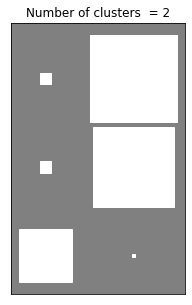

[[653   1 345]
 [552   1 311]
 [  6 360   4]]


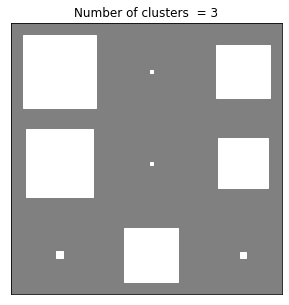

[[ 34 357 556   1  51]
 [ 14 294 545   1  10]
 [ 12   3   6 330  19]]


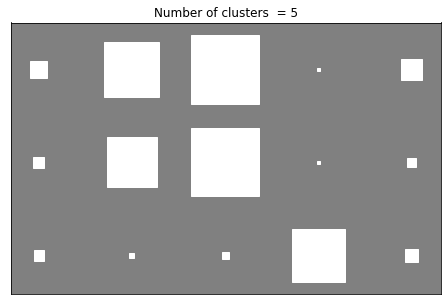

[[  0 210 160 125  79   3 133 204  51  34]
 [  0  85 204 113 108   4 135 191  10  14]
 [231   0   1  10   2  93   2   0  19  12]]


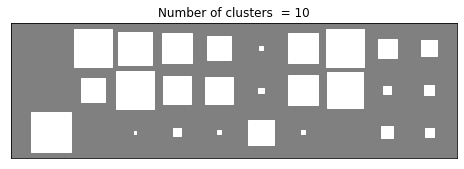

[[  0  48 109  85  82   0  73  56 140  32  51   7  77   0  42   0  49  34
    1 113]
 [  0  36  79  64  69   0  65  65 133  30  10  19  39   0  98   0  98  14
    0  45]
 [108   5   0   0   0 131   2   2   0   2  19  22   0  65   2   1   0  11
    0   0]]


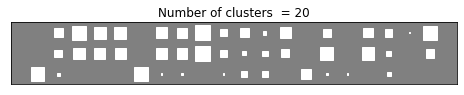

In [38]:
# TODO: compute the contingency matrices between labels and k-means partitions
#       (either implement your own or find the function in sklearn.metrics.cluster)


# TODO: visualize the contingency matrices via hinton plots and 
#       label the plots by the number of clusters used in k-means


cont_matrix = {2:np.array([]),3:np.array([]),5:np.array([]),10:np.array([]),20:np.array([])}   ##this array will store contigency matrix for all clusters

for i in range(len(ks)):  ##looping over all the clusters
    cont_matrix[ks[i]] = contingency_matrix(labels.T,partitions[i,:].T)  ##  calculating contigency matrix
    print(cont_matrix[ks[i]])
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))   ##inittializing plot
    axs.set_title('Number of clusters  = '+str(ks[i]))

    hinton_plot(cont_matrix[ks[i]].T,max_weight=None,ax = axs)  ##passing the values 
    plt.show()





### Interpretation -


- For the first two plots we see that there is exactly one cluster which has more common points of **truth-label 2** and other clusters has common points with **truth label 0 and 1** in almost equal amounts.

- For the last three plots (ks =5, 10,20) we see some clusters like above explanation but there are other clusters which has mixed points of all labels with them.

(b)

In [39]:
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, v_measure_score
iter=  0
for k, partition in zip(ks, partitions):

    Rand_score = rand_score(labels,partition)
    Adjusted_rand_score =  adjusted_rand_score(labels, partition)
    Mutual_info_score = mutual_info_score(labels,partition)
    V_measure_score = v_measure_score(labels,partition)

    print(f'{Rand_score = }',f'{Adjusted_rand_score = }',f'{Mutual_info_score = }',f'{V_measure_score = }')




# TODO: compute and print the different scores as requested in the excercise

Rand_score = 0.6481299568062638 Adjusted_rand_score = 0.36077853232930374 Mutual_info_score = 0.39534332849247383 V_measure_score = 0.5285855979823327
Rand_score = 0.6465657689239447 Adjusted_rand_score = 0.259432761895148 Mutual_info_score = 0.41567365518450516 V_measure_score = 0.41316208346649186
Rand_score = 0.6413194394284495 Adjusted_rand_score = 0.2276969117496487 Mutual_info_score = 0.39303732230202754 V_measure_score = 0.35211448592312977
Rand_score = 0.6368315283776907 Adjusted_rand_score = 0.10880207235236414 Mutual_info_score = 0.3936409218177637 V_measure_score = 0.24650777719877184
Rand_score = 0.6310518982932776 Adjusted_rand_score = 0.06135047674304189 Mutual_info_score = 0.40449850012337163 V_measure_score = 0.211081072203569


## Which Clustering to choose ?

We see that first clustering outperforms from all other 4 in all scores. But Second Clustering( ks = 3) gives more mutual info than the first. 
However, when it comes to choosing the optimal clustering we should not only considers scores but some other performances as well.
Since we see that all clustering algorithms have clusters which have mixed number of first two quarks and some clusters only contain the last quarks.

If we now look at our first two clustering on the basis of such approach we see that the In the **2nd clustering algorithm(ks = 3)** second cluster(column two) agrees 360 times with the third quark and only *1* times each with first two quarks. Similarly In the  **1st clustering algorithm(ks = 2)** first cluster (first column) agrees 369 times but contains (15+17 = 32) first two quarks.

Hence when it comes to experimental analysis perspectives we will opt the second clustering with ks =3 :) 

## 3 Mutual Information for Image Matching
(a)

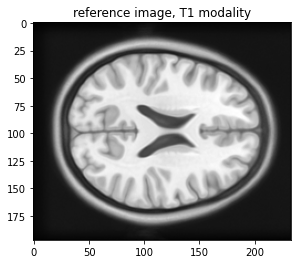

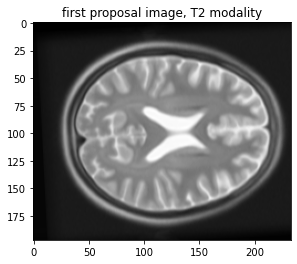

In [40]:
# load the reference image and the proposals
reference = np.load('data/t1_reference.npy')
proposals = np.load('data/t2_registration_proposals.npy')

plt.imshow(reference, cmap='gray')
plt.title('reference image, T1 modality')
plt.show();

plt.imshow(proposals[0], cmap='gray')
plt.title('first proposal image, T2 modality')
plt.show();

In [130]:
np.min(proposals)

0.19431926

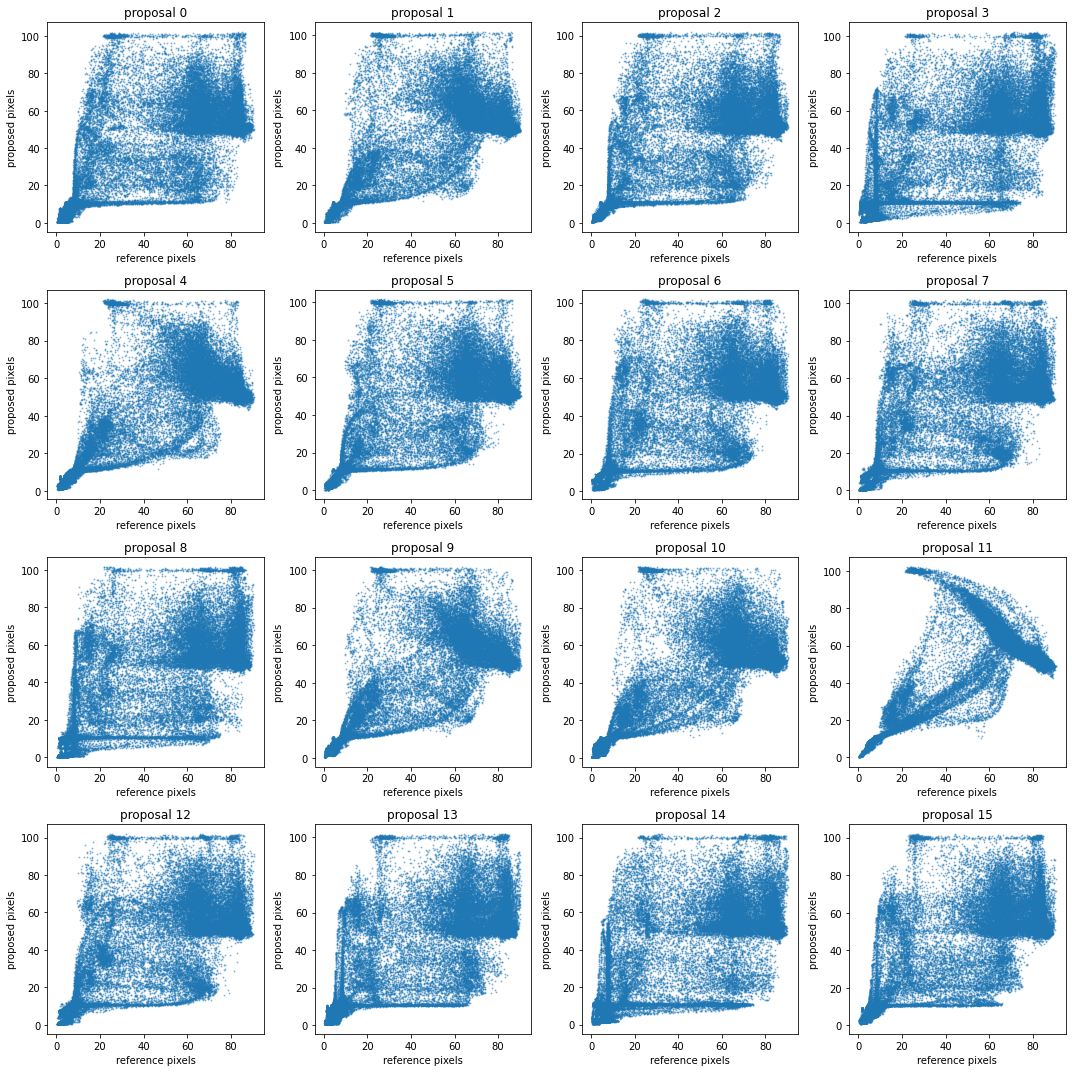

In [77]:
# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, proposal) in enumerate(zip(axs.flatten(), proposals)):
    # TODO: make a scatterplot of the reference pixel intensities vs the pixel intensities in the i-th proposal
    #       do not forget to label the axes
    ax.scatter(reference.flatten(),proposal.flatten(),s = 1,alpha = 0.4)
    ax.set_xlabel('reference pixels')
    ax.set_ylabel('proposed pixels')

    
    ax.set_title(f'proposal {i}')
plt.tight_layout()
plt.show();

(b)

In [80]:
np.histogram2d?

Signature:
np.histogram2d(
    x,
    y,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the bi-dimensional histogram of two data samples.

Parameters
----------
x : array_like, shape (N,)
    An array containing the x coordinates of the points to be
    histogrammed.
y : array_like, shape (N,)
    An array containing the y coordinates of the points to be
    histogrammed.
bins : int or array_like or [int, int] or [array, array], optional
    The bin specification:

      * If int, the number of bins for the two dimensions (nx=ny=bins).
      * If array_like, the bin edges for the two dimensions
        (x_edges=y_edges=bins).
      * If [int, int], the number of bins in each dimension
        (nx, ny = bins).
      * If [array, array], the bin edges in each dimension
        (x_edges, y_edges = bins).
      * A combination [int, array] or [array, int], where int
        is the number of bins and array is the bin edges.

range : ar

In [92]:
proposals.shape

In [94]:
proposals.flatten?

Docstring:
a.flatten(order='C')

Return a copy of the array collapsed into one dimension.

Parameters
----------
order : {'C', 'F', 'A', 'K'}, optional
    'C' means to flatten in row-major (C-style) order.
    'F' means to flatten in column-major (Fortran-
    style) order. 'A' means to flatten in column-major
    order if `a` is Fortran *contiguous* in memory,
    row-major order otherwise. 'K' means to flatten
    `a` in the order the elements occur in memory.
    The default is 'C'.

Returns
-------
y : ndarray
    A copy of the input array, flattened to one dimension.

See Also
--------
ravel : Return a flattened array.
flat : A 1-D flat iterator over the array.

Examples
--------
>>> a = np.array([[1,2], [3,4]])
>>> a.flatten()
array([1, 2, 3, 4])
>>> a.flatten('F')
array([1, 3, 2, 4])
Type:      builtin_function_or_method


In [103]:
proposals.flatten(order='R').shape

ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'R')

In [114]:
for i in enumerate(proposals):
    print(type(i))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [133]:
np.min(reference)


In [134]:
# TODO: For each proposal, create a 2D histograms of pixel intensities of it and the reference 
#       (Choose a sensible range and bins for the histogram)
# Hint: np.histogram2d, flatten the arrays as pixel positions don't matter

histograms =  np.array([np.histogram2d(reference.flatten(),proposals[i].flatten(),bins= 10,range = [[reference.min(),reference.max()],[proposals[i].min(),proposals[i].max()]] )[0] for i in range(16) ])


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

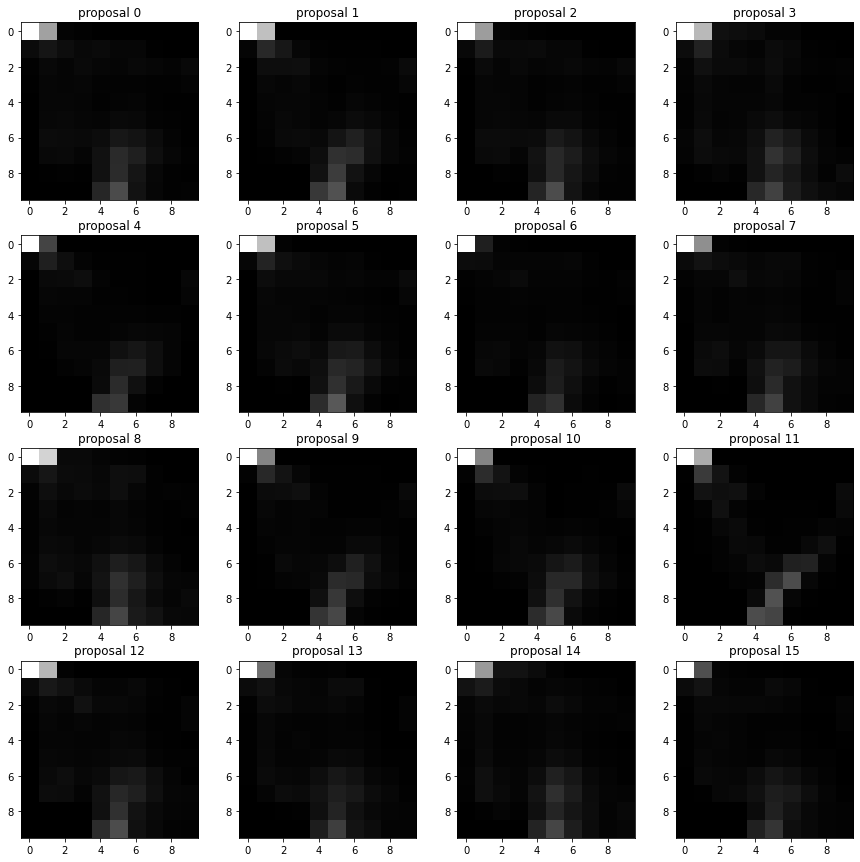

In [143]:

# TODO: plot the histograms

# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, hist) in enumerate(zip(axs.flatten(), histograms)):
    # TODO: plot the histogram for the i'th proposal. 
    # print(np.max(hist),np.min(hist))
    ax.imshow(hist/np.max(hist),cmap = 'gray')
    ax.set_title(f'proposal {i}')
plt.colorbar(cmap ='gray' )

plt.tight_layout()
plt.show();

In [ ]:
from sklearn.metrics import mutual_info_score

# TODO: for each histogram, compute the mutual information score

Mutual_info_arr = []

# TODO: order the proposal by MI, plot them in this order and include the scores in the titles of the plots